<a href="https://colab.research.google.com/github/NishthaJethani/traffic-sign-detection-recognition/blob/main/Traffic_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

kaggle_api_key = "/content/drive/My Drive/kaggle.json"

Mounted at /content/drive


In [2]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive"
!cp "{kaggle_api_key}" /content/drive/MyDrive/kaggle.json
!chmod 600 /content/drive/MyDrive/kaggle.json


cp: '/content/drive/My Drive/kaggle.json' and '/content/drive/MyDrive/kaggle.json' are the same file


In [3]:
import kaggle

kaggle_dataset_name = "sarangdilipjodh/indian-traffic-signs-prediction85-classes"

# Replace 'destination_directory' with the desired destination within your Colab environment
destination_directory = "/content/dataset/"

# Use the Kaggle API to load the dataset without downloading it
kaggle.api.dataset_download_files(kaggle_dataset_name, path=destination_directory, unzip=True)


In [4]:
extracted_files=os.listdir("/content/dataset/traffic_sign_classification_dataset")
print(extracted_files)

['test', 'train']


In [5]:
import tensorflow as tf
from tensorflow import keras
from traitlets.traitlets import validate
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data_dir = '/content/dataset/traffic_sign_classification_dataset/train'
test_data_dir = '/content/dataset/traffic_sign_classification_dataset/test'

train = image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[128,128],
    interpolation='nearest',
    validation_split=0.2,
    batch_size=64,
    shuffle=True,
    seed=42,
    subset="training",
)
train

validate=image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[128,128],
    interpolation='nearest',
    validation_split=0.2,
    batch_size=64,
    shuffle=False,
    seed=42,
    subset="validation",
)

test=image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[128,128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)


Found 4438 files belonging to 85 classes.
Using 3551 files for training.
Found 4438 files belonging to 85 classes.
Using 887 files for validation.
Found 1288 files belonging to 85 classes.


In [6]:
import numpy as np

class_names = train.class_names

# Iterate over the dataset and print each batch
for images, labels in train:
    # 'images' is a batch of images, and 'labels' is a batch of corresponding labels
    # Print the shape of the image batch (number of images in the batch, image height, image width, number of channels)
    print("Image batch shape:", images.shape)

    # Print the shape of the label batch (number of labels in the batch, number of classes)
    print("Label batch shape:", labels.shape)

    # If you want to see the actual class labels instead of one-hot encoded labels
    # Convert one-hot encoded labels to the class names
    label_names = [class_names[np.argmax(label)] for label in labels]
    print("Labels:", label_names)

    # Print other information or perform any other processing as needed for each batch
    # For example, you can visualize the images or perform data augmentation

    # Break the loop after printing one batch to avoid printing the entire dataset
    break



Image batch shape: (64, 128, 128, 3)
Label batch shape: (64, 85)
Labels: ['LEFT_REVERSE_BEND', 'SPEED_LIMIT_70', 'SPEED_LIMIT_70', 'SPEED_LIMIT_60', 'RIGHT_TURN_PROHIBITED', 'U_TURN_PROHIBITED', 'SPEED_LIMIT_80', 'COMPULSARY_KEEP_RIGHT', 'SPEED_LIMIT_60', 'SPEED_LIMIT_70', 'SPEED_LIMIT_30', 'CYCLE_CROSSING', 'HORN_PROHIBITED', 'CYCLE_PROHIBITED', 'HORN_PROHIBITED', 'COMPULSARY_KEEP_RIGHT', 'SIDE_ROAD_RIGHT', 'GUARDED_LEVEL_CROSSING', 'COMPULSARY_AHEAD_OR_TURN_RIGHT', 'SPEED_LIMIT_70', 'STEEP_ASCENT', 'COMPULSARY_KEEP_RIGHT', 'NO_STOPPING_OR_STANDING', 'FALLING_ROCKS', 'SPEED_LIMIT_80', 'SPEED_LIMIT_60', 'STEEP_DESCENT', 'NO_STOPPING_OR_STANDING', 'SPEED_LIMIT_30', 'HEIGHT_LIMIT', 'SCHOOL_AHEAD', 'GAP_IN_MEDIAN', 'ALL_MOTOR_VEHICLE_PROHIBITED', 'SIDE_ROAD_LEFT', 'Y_INTERSECTION', 'COMPULSARY_KEEP_LEFT', 'HORN_PROHIBITED', 'STRAIGHT_PROHIBITED', 'COMPULSARY_TURN_LEFT_AHEAD', 'GAP_IN_MEDIAN', 'SPEED_LIMIT_60', 'WIDTH_LIMIT', 'BULLOCK_AND_HANDCART_PROHIBITED', 'SPEED_LIMIT_50', 'COMPULSARY

In [7]:
class_names = validate.class_names

# Iterate over the dataset and print each batch
for images, labels in test:
    # 'images' is a batch of images, and 'labels' is a batch of corresponding labels
    # Print the shape of the image batch (number of images in the batch, image height, image width, number of channels)
    print("Image batch shape:", images.shape)

    # Print the shape of the label batch (number of labels in the batch, number of classes)
    print("Label batch shape:", labels.shape)

    # If you want to see the actual class labels instead of one-hot encoded labels
    # Convert one-hot encoded labels to the class names
    label_names = [class_names[np.argmax(label)] for label in labels]
    print("Labels:", label_names)

    # Print other information or perform any other processing as needed for each batch
    # For example, you can visualize the images or perform data augmentation

    # Break the loop after printing one batch to avoid printing the entire dataset
    break


Image batch shape: (64, 128, 128, 3)
Label batch shape: (64, 85)
Labels: ['ALL_MOTOR_VEHICLE_PROHIBITED', 'ALL_MOTOR_VEHICLE_PROHIBITED', 'ALL_MOTOR_VEHICLE_PROHIBITED', 'ALL_MOTOR_VEHICLE_PROHIBITED', 'ALL_MOTOR_VEHICLE_PROHIBITED', 'AXLE_LOAD_LIMIT', 'AXLE_LOAD_LIMIT', 'AXLE_LOAD_LIMIT', 'AXLE_LOAD_LIMIT', 'AXLE_LOAD_LIMIT', 'BARRIER_AHEAD', 'BARRIER_AHEAD', 'BULLOCK_AND_HANDCART_PROHIBITED', 'BULLOCK_AND_HANDCART_PROHIBITED', 'BULLOCK_PROHIBITED', 'BULLOCK_PROHIBITED', 'BULLOCK_PROHIBITED', 'BULLOCK_PROHIBITED', 'BULLOCK_PROHIBITED', 'CATTLE', 'CATTLE', 'CATTLE', 'CATTLE', 'CATTLE', 'CATTLE', 'CATTLE', 'CATTLE', 'CATTLE', 'CATTLE', 'CATTLE', 'COMPULSARY_AHEAD', 'COMPULSARY_AHEAD', 'COMPULSARY_AHEAD', 'COMPULSARY_AHEAD', 'COMPULSARY_AHEAD', 'COMPULSARY_AHEAD', 'COMPULSARY_AHEAD', 'COMPULSARY_AHEAD', 'COMPULSARY_AHEAD', 'COMPULSARY_AHEAD', 'COMPULSARY_AHEAD_OR_TURN_LEFT', 'COMPULSARY_AHEAD_OR_TURN_LEFT', 'COMPULSARY_AHEAD_OR_TURN_LEFT', 'COMPULSARY_AHEAD_OR_TURN_LEFT', 'COMPULSARY_AHE

In [8]:
import matplotlib.pyplot as plt

# Assuming you have already created your TensorFlow dataset, let's call it 'dataset'

# Define a function to plot and display images
def plot_images(train, num_images=5):
    # Take the first 'num_images' samples from the dataset
    images = []
    for image, label in train.take(num_images):
        images.append(image.numpy())

    # Create a figure to display the images
    plt.figure(figsize=(10, 5))

    # Plot each image
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.axis('off')

    plt.show()

    plot_images(train)


In [9]:
signs=[]

all_signs=os.listdir(train_data_dir)

for item in all_signs:
  signs.append(item)



signs

['WIDTH_LIMIT',
 'SPEED_LIMIT_80',
 'STOP',
 'CATTLE',
 'NO_ENTRY',
 'SLIPPERY_ROAD',
 'TRAFFIC_SIGNAL',
 'ROAD_WIDENS_AHEAD',
 'SPEED_LIMIT_30',
 'TONGA_PROHIBITED',
 'LOOSE_GRAVEL',
 'PEDESTRIAN_CROSSING',
 'STRAIGHT_PROHIBITED',
 'QUAY_SIDE_OR_RIVER_BANK',
 'GAP_IN_MEDIAN',
 'RIGHT_TURN_PROHIBITED',
 'STEEP_ASCENT',
 'COMPULSARY_TURN_RIGHT',
 'PEDESTRIAN_PROHIBITED',
 'COMPULSARY_CYCLE_TRACK',
 'HANDCART_PROHIBITED',
 'SCHOOL_AHEAD',
 'SPEED_LIMIT_40',
 'GIVE_WAY',
 'CYCLE_PROHIBITED',
 'COMPULSARY_TURN_RIGHT_AHEAD',
 'LEFT_REVERSE_BEND',
 'COMPULSARY_SOUND_HORN',
 'RIGHT_HAND_CURVE',
 'TRUCK_PROHIBITED',
 'SIDE_ROAD_RIGHT',
 'PASS_EITHER_SIDE',
 'ALL_MOTOR_VEHICLE_PROHIBITED',
 'CYCLE_CROSSING',
 'LEFT_TURN_PROHIBITED',
 'BULLOCK_AND_HANDCART_PROHIBITED',
 'COMPULSARY_KEEP_RIGHT',
 'HUMP_OR_ROUGH_ROAD',
 'COMPULSARY_TURN_LEFT',
 'RIGHT_REVERSE_BEND',
 'COMPULSARY_TURN_LEFT_AHEAD',
 'DANGEROUS_DIP',
 'FERRY',
 'COMPULSARY_MINIMUM_SPEED',
 'SPEED_LIMIT_5',
 'TURN_RIGHT',
 'BULLOCK_PR

In [10]:
from tensorflow.keras import models, layers

model=models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(128,128,3)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),
    layers.Dropout(rate=0.25),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),
    layers.Dropout(rate=0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.25),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.25),

    layers.Dense(85, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 32)      12832     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 64)        3

In [12]:
from tensorflow import keras

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/20
56/56 [==============================] - 61s 663ms/step - loss: 3.1268 - accuracy: 0.2653 - val_loss: 156.2337 - val_accuracy: 0.0045
Epoch 2/20
56/56 [==============================] - 41s 647ms/step - loss: 1.7842 - accuracy: 0.5162 - val_loss: 22.0177 - val_accuracy: 0.0417
Epoch 3/20
56/56 [==============================] - 41s 639ms/step - loss: 1.2179 - accuracy: 0.6604 - val_loss: 7.2326 - val_accuracy: 0.0947
Epoch 4/20
56/56 [==============================] - 40s 617ms/step - loss: 0.8406 - accuracy: 0.7623 - val_loss: 0.8025 - val_accuracy: 0.7418
Epoch 5/20
56/56 [==============================] - 41s 611ms/step - loss: 0.6368 - accuracy: 0.8082 - val_loss: 0.6123 - val_accuracy: 0.8286
Epoch 6/20
56/56 [==============================] - 41s 612ms/step - loss: 0.4624 - accuracy: 0.8617 - val_loss: 0.2651 - val_accuracy: 0.9278
Epoch 7/20
56/56 [==============================] - 41s 627ms/step - loss: 0.3633 - accuracy: 0.8955 - val_loss: 0.9478 - val_accuracy: 0.7

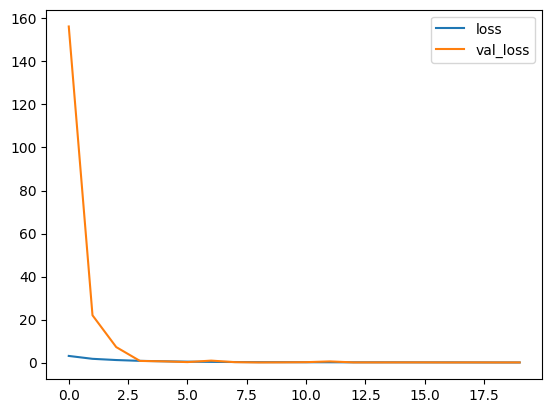

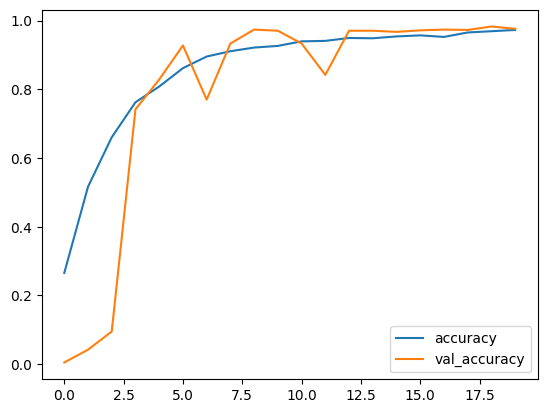

In [13]:
history=model.fit(train, epochs=20, validation_data=validate)

import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [14]:
test_loss, test_accuracy = model.evaluate(test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


21/21 [==============================] - 5s 251ms/step - loss: 1.1094 - accuracy: 0.8354
Test Loss: 1.1093885898590088
Test Accuracy: 0.8354037404060364
